## Bloco 3

> ### Atividade 3

---

**Descrição da atividade**

Na presente tarefa, o objetivo é de indentificação de valores anômalos no conjunto de dados, apoiando-se apenas no conjunto de dados referente aos genes identificados na literatura como indicadores para a idade e sexo de um indivíduo.

---

**1. Importação dos dados**

Como ponto de partida, os dados são importados e o dado categórico "Idade" é transformado em um dado numérico aleatório do presente intervalo.

In [1]:
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import random

In [2]:
df = pd.read_csv('data_artigo.csv')
df = df.drop("Unnamed: 0",axis=1)

df['Idade']=df['Idade'].replace('20-29',random.randint(20, 29))
df['Idade']=df['Idade'].replace('30-39',random.randint(30, 39))
df['Idade']=df['Idade'].replace('40-49',random.randint(40, 49))
df['Idade']=df['Idade'].replace('50-59',random.randint(50, 59))
df['Idade']=df['Idade'].replace('60-69',random.randint(60, 69))
df['Idade']=df['Idade'].replace('70-79',random.randint(70, 79))

df.head()

,Amostra,Sexo,Categoria Idade,Idade,MMP1,MMP3,MMP9,MMP11,MMP24,MMP27,BARD1,BCL7C,CLPTM1L,TERT,CDKN1A
0,GTEX-U8XE,male,Jovem,33,0.415301,0.019599,0.609227,0.088210,0.000014,0.851644,0.354668,0.472280,0.910613,0.456960,0.770863
1,GTEX-UPJH,male,Adulto,55,0.000005,0.007997,0.159422,0.038826,0.503206,0.168324,0.491779,0.604135,0.656658,0.020528,0.301729
2,GTEX-UPK5,male,Adulto,48,0.000000,0.007150,0.000003,0.047462,0.000003,0.310585,0.215032,0.536110,0.690726,0.000000,0.230042
3,GTEX-V1D1,male,Adulto,55,0.000000,0.000000,0.062979,0.000001,0.000034,0.523176,0.488843,0.430027,0.459522,0.183716,0.266740
4,GTEX-VJYA,male,Idoso,61,0.000000,0.019699,0.329350,0.037106,0.444207,0.744908,0.250793,0.411447,0.618432,0.223564,0.134728


---

**2. Redução de Dimensionalidade**

Após carregarmos os dados, é necessário reduzir a dimensionalidade do problema para facilitar a identifica

In [3]:
X = df.reindex(df.columns[4:],axis=1)

X_vals = X.values
X.head()

,MMP1,MMP3,MMP9,MMP11,MMP24,MMP27,BARD1,BCL7C,CLPTM1L,TERT,CDKN1A
0,0.415301,0.019599,0.609227,0.088210,0.000014,0.851644,0.354668,0.472280,0.910613,0.456960,0.770863
1,0.000005,0.007997,0.159422,0.038826,0.503206,0.168324,0.491779,0.604135,0.656658,0.020528,0.301729
2,0.000000,0.007150,0.000003,0.047462,0.000003,0.310585,0.215032,0.536110,0.690726,0.000000,0.230042
3,0.000000,0.000000,0.062979,0.000001,0.000034,0.523176,0.488843,0.430027,0.459522,0.183716,0.266740
4,0.000000,0.019699,0.329350,0.037106,0.444207,0.744908,0.250793,0.411447,0.618432,0.223564,0.134728


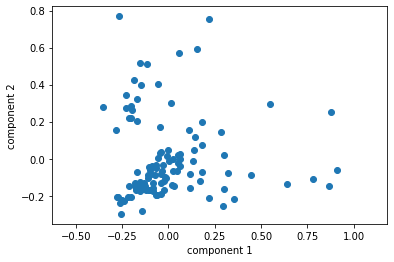

In [4]:
pca = PCA()
pca.fit(X_vals)
X_pca = pca.transform(X_vals)

X_new = pca.inverse_transform(X_pca)
plt.scatter(X_pca[:, 0], X_pca[:, 1]) #, alpha=0.1)
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.axis('equal');
plt.show()

---

**3. Algoritmo Local Outlier Factor (LOF)**

Uma vez que temos nossos dados importados, podemos aplicar o algoritmo de identificação LOF.

In [5]:
from sklearn.neighbors import LocalOutlierFactor

N_VIZINHOS = 35
FRACAO_OUTLIERS = 0.1

modelo_lof = LocalOutlierFactor(
    n_neighbors=N_VIZINHOS,
    contamination=FRACAO_OUTLIERS,
)

In [6]:
modelo_lof.fit(X_pca)
previsao = modelo_lof.fit_predict(X_pca)

In [7]:
previsao

array([-1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1, -1,
       -1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,
        1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1, -1,  1, -1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1])

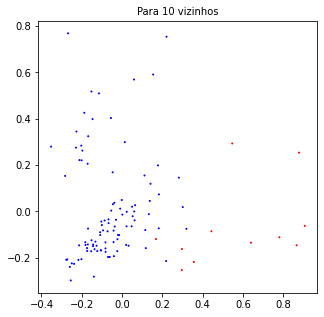

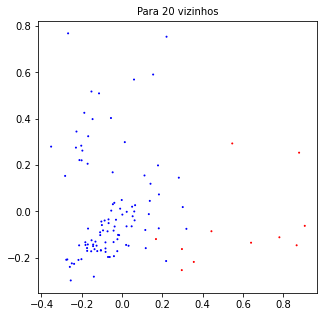

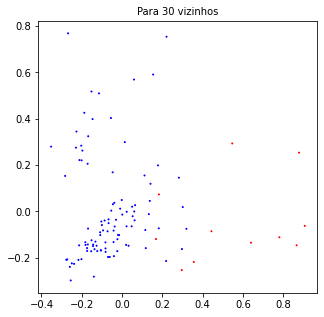

In [8]:
CORES = np.array(["red", "blue"])

for n in [10, 20, 30]:

    N_VIZINHOS = n
    FRACAO_OUTLIERS = 0.1

    modelo_lof = LocalOutlierFactor(
        n_neighbors=N_VIZINHOS,
        contamination=FRACAO_OUTLIERS,
    )

    modelo_lof.fit(X_pca)
    previsao = modelo_lof.fit_predict(X_pca)

    fig, eixo = plt.subplots(figsize=(5, 5))

    eixo.scatter(
        X_pca[:, 0],
        X_pca[:, 1],
        marker=".",
        s=4,
        color=CORES[(previsao + 1) // 2],
    )
    
    eixo.set_title(f"Para {n} vizinhos", fontsize=10)

    plt.show()

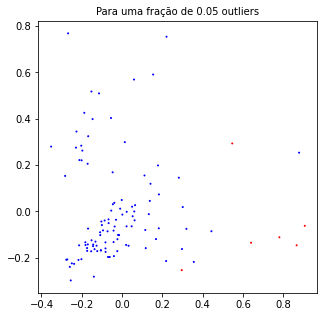

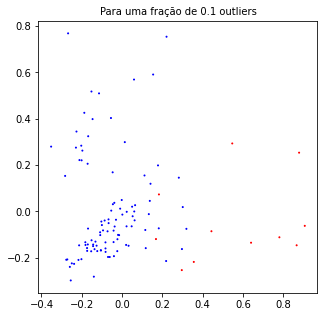

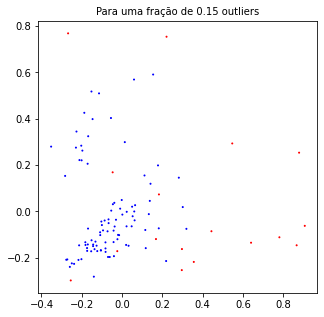

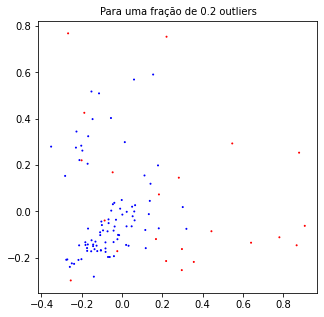

In [9]:
CORES = np.array(["red", "blue"])

for n in [0.05,0.1,0.15,0.2]:

    N_VIZINHOS = 35
    FRACAO_OUTLIERS = n

    modelo_lof = LocalOutlierFactor(
        n_neighbors=N_VIZINHOS,
        contamination=FRACAO_OUTLIERS,
    )

    modelo_lof.fit(X_pca)
    previsao = modelo_lof.fit_predict(X_pca)

    fig, eixo = plt.subplots(figsize=(5, 5))

    eixo.scatter(
        X_pca[:, 0],
        X_pca[:, 1],
        marker=".",
        s=4,
        color=CORES[(previsao + 1) // 2],
    )
    
    eixo.set_title(f"Para uma fração de {n} outliers", fontsize=10)

    plt.show()

**Análise dos resultados**

Por conta da proximidade que existe entre os dados coloridos em azul, é possível supor que a utilização de 30 vizinhos e 0.1 como fração de outliers parece ser suficiente para o problema.

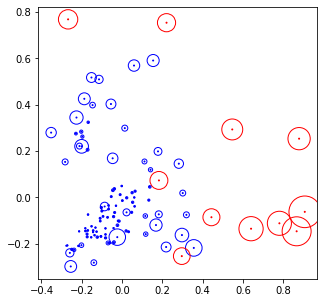

In [10]:
N_VIZINHOS = 70
FRACAO_OUTLIERS = 0.1

modelo_lof = LocalOutlierFactor(
    n_neighbors=N_VIZINHOS,
    contamination=FRACAO_OUTLIERS,
)

modelo_lof.fit(X_pca)
previsao = modelo_lof.fit_predict(X_pca)

fig, eixo = plt.subplots(figsize=(5, 5))

eixo.scatter(
    X_pca[:, 0],
    X_pca[:, 1],
    marker=".",
    s=4,
    color=CORES[(previsao + 1) // 2],
)

X_lof = modelo_lof.negative_outlier_factor_
raios = (X_lof.max() - X_lof) / (X_lof.max() - X_lof.min())
eixo.scatter(
    X_pca[:, 0],
    X_pca[:, 1],
    s=1000 * raios,
    edgecolors=CORES[(previsao + 1) // 2],
    facecolors="none",
)

plt.show()

---

**4. Aplicação do Algoritmo Isolation Forest**

Em seguida, aplicamos então o algoritmo de IF.

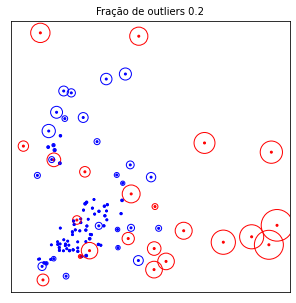

In [11]:
from sklearn.ensemble import IsolationForest

CORES = np.array(["red", "blue"])
COM_BORDA_DE_PREVISAO = False
SEMENTE_ALEATORIA = 73214

modelo_if = IsolationForest(
    contamination=n,
    random_state=SEMENTE_ALEATORIA,
)

modelo_if.fit(X_pca)
previsao = modelo_if.predict(X_pca)

fig, eixo = plt.subplots(figsize=(5, 5))

eixo.scatter(
    X_pca[:, 0],
    X_pca[:, 1],
    s=4,
    color=CORES[(previsao + 1) // 2],
)

eixo.set_xticks(())
eixo.set_yticks(())
eixo.set_title(f"Fração de outliers {n}", fontsize=10)

X_lof = modelo_lof.negative_outlier_factor_
raios = (X_lof.max() - X_lof) / (X_lof.max() - X_lof.min())
eixo.scatter(
X_pca[:, 0],
X_pca[:, 1],
s=1000 * raios,
edgecolors=CORES[(previsao + 1) // 2],
facecolors="none",
)

plt.show()
plt.show()

**Análise dos resultados**

Por conta da proximidade que existe entre os dados coloridos em azul, é possível supor que a utilização de 0.1 como fração de outliers é a mais adequada.

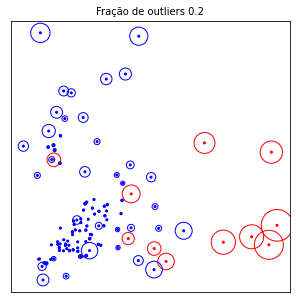

In [12]:
modelo_if = IsolationForest(
    contamination=0.1,
    random_state=SEMENTE_ALEATORIA,
)

modelo_if.fit(X_pca)
previsao = modelo_if.predict(X_pca)

fig, eixo = plt.subplots(figsize=(5, 5))

eixo.scatter(
    X_pca[:, 0],
    X_pca[:, 1],
    s=4,
    color=CORES[(previsao + 1) // 2],
)

eixo.set_xticks(())
eixo.set_yticks(())
eixo.set_title(f"Fração de outliers {n}", fontsize=10)

X_lof = modelo_lof.negative_outlier_factor_
raios = (X_lof.max() - X_lof) / (X_lof.max() - X_lof.min())
eixo.scatter(
    X_pca[:, 0],
    X_pca[:, 1],
    s=1000 * raios,
    edgecolors=CORES[(previsao + 1) // 2],
    facecolors="none",
)

plt.show()

---

**Conclusão**

Como conclusão da aplicação dos algoritmos de Isolation Forest e Local Outlier Factor, é possível observar que para o estudo, o algoritmo LOF foi mais adequado para o problema, de forma a englobar com uma maior eficiência os dados que formaram um cluster a partir do PCA feito. Ambos os métodos não foram completamente eficientes se analisarmos a região em que os dados estão concentrados, já que existe dados destoantes e distantes dos demais, de forma com que, novamente, o LOF tenha uma menor quantidade de valores discrepantes.